### EXP1 Results for 1000 images for 3 epochs 

In [1]:
import os
import pandas as pd

csv_files = [
    './direction_results.csv', 
    './length_results.csv', 
    './position_common_scale_results.csv', 
    './position_non_aligned_scale_results.csv',
    './angle_results.csv',
    './area_results.csv',
    './volume_results.csv',
    './curvature_results.csv',
    './shading_results.csv'
]

all_data = pd.concat([pd.read_csv(f).assign(task=os.path.basename(f).replace('_results.csv', '')) for f in csv_files if os.path.exists(f)], ignore_index=True)
final_summary = all_data.query("run == 'average'")[['task', 'model_name', 'mlae', 'std', 'confidence']].round(3)
final_summary = final_summary.sort_values(by=['task', 'mlae'])

final_summary


,task,model_name,mlae,std,confidence
681,angle,CustomLLaMA,2.798,0.052,0.102
650,angle,gpt4o,4.423,0.168,0.328
743,angle,GeminiProVision,4.608,0.072,0.142
774,angle,Gemini1_5Flash,4.700,0.203,0.397
712,angle,LLaMA,4.896,0.107,0.209
836,area,CustomLLaMA,9.355,0.037,0.073
805,area,gpt4o,10.295,0.417,0.818
867,area,LLaMA,11.467,0.168,0.330
929,area,Gemini1_5Flash,11.772,0.203,0.398
898,area,GeminiProVision,12.515,0.001,0.001


In [3]:
# Filter for CustomLLaMA only
custom_llama_summary = final_summary[final_summary['model_name'] == 'CustomLLaMA'][['task', 'mlae']]

# Create a DataFrame to store the summary and sort by task alphabetically
custom_llama_df = pd.DataFrame(custom_llama_summary).sort_values(by='task')

# Display the DataFrame
custom_llama_df


,task,mlae
681,angle,2.798
836,area,9.355
1146,curvature,-2.941
61,direction,7.122
216,length,1.910
371,position_common_scale,2.456
526,position_non_aligned_scale,2.178
1301,shading,2.122
991,volume,11.044


In [15]:
pwd

'/home/huuthanhvy.nguyen001/LLMP/EXP/EXP1-Results'

### Display all 9 images tasks


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Define the base folder where images are located
base_folder = "." 

# List of CSV files to read
csv_files = [
    './direction_results.csv', 
    './length_results.csv', 
    './position_common_scale_results.csv', 
    './position_non_aligned_scale_results.csv',
    './angle_results.csv',
    './area_results.csv',
    './volume_results.csv',
    './curvature_results.csv',
    './shading_results.csv'
]

# Number of columns for the plot
num_cols = 5
num_rows = 2

# Create a figure with subplots for displaying images in 2 rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))
fig.suptitle("First Image for Each Task with Ground Truth", fontsize=16)

# Flatten axes for easy iteration if there are multiple rows
axes = axes.flatten()

# Loop through each CSV file and display the first image for each task
for idx, csv_file in enumerate(csv_files):
    # Check if there is an available axis for this image
    if idx >= num_rows * num_cols:
        break
    
    # Read the CSV file
    if not os.path.exists(csv_file):
        print(f"CSV file not found: {csv_file}")
        continue

    results_df = pd.read_csv(csv_file)

    # Extract the task name from the CSV filename (e.g., 'angle' from 'angle_results.csv')
    task = os.path.basename(csv_file).replace('_results.csv', '')

    # Get the first row to display the first image for this task
    first_row = results_df.iloc[0]
    
    # Extract the filename only from the image path
    #image_filename = os.path.basename(first_row["image_path"])  # e.g., 'angle_image_6.png'
    
    # Construct the path with base_folder and the filename
    #image_path = os.path.join(base_folder, task, image_filename)  # e.g., './angle/angle_image_6.png'
    ground_truth = first_row["ground_truth"]

    # Display the image in the subplot
    #if os.path.exists(image_path):
        #img = Image.open(image_path)
        #axes[idx].imshow(img, cmap="gray")
        #axes[idx].set_title(f"{task.capitalize()}\nGT: {ground_truth}")
    #else:
        #print(f"Image not found: {image_path}")
        #axes[idx].set_title(f"{task.capitalize()}\nImage not found")
    
    #axes[idx].axis("off")

# Hide any remaining empty subplots
for j in range(idx + 1, num_rows * num_cols):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


### Function to Display all images for all tasks for all models

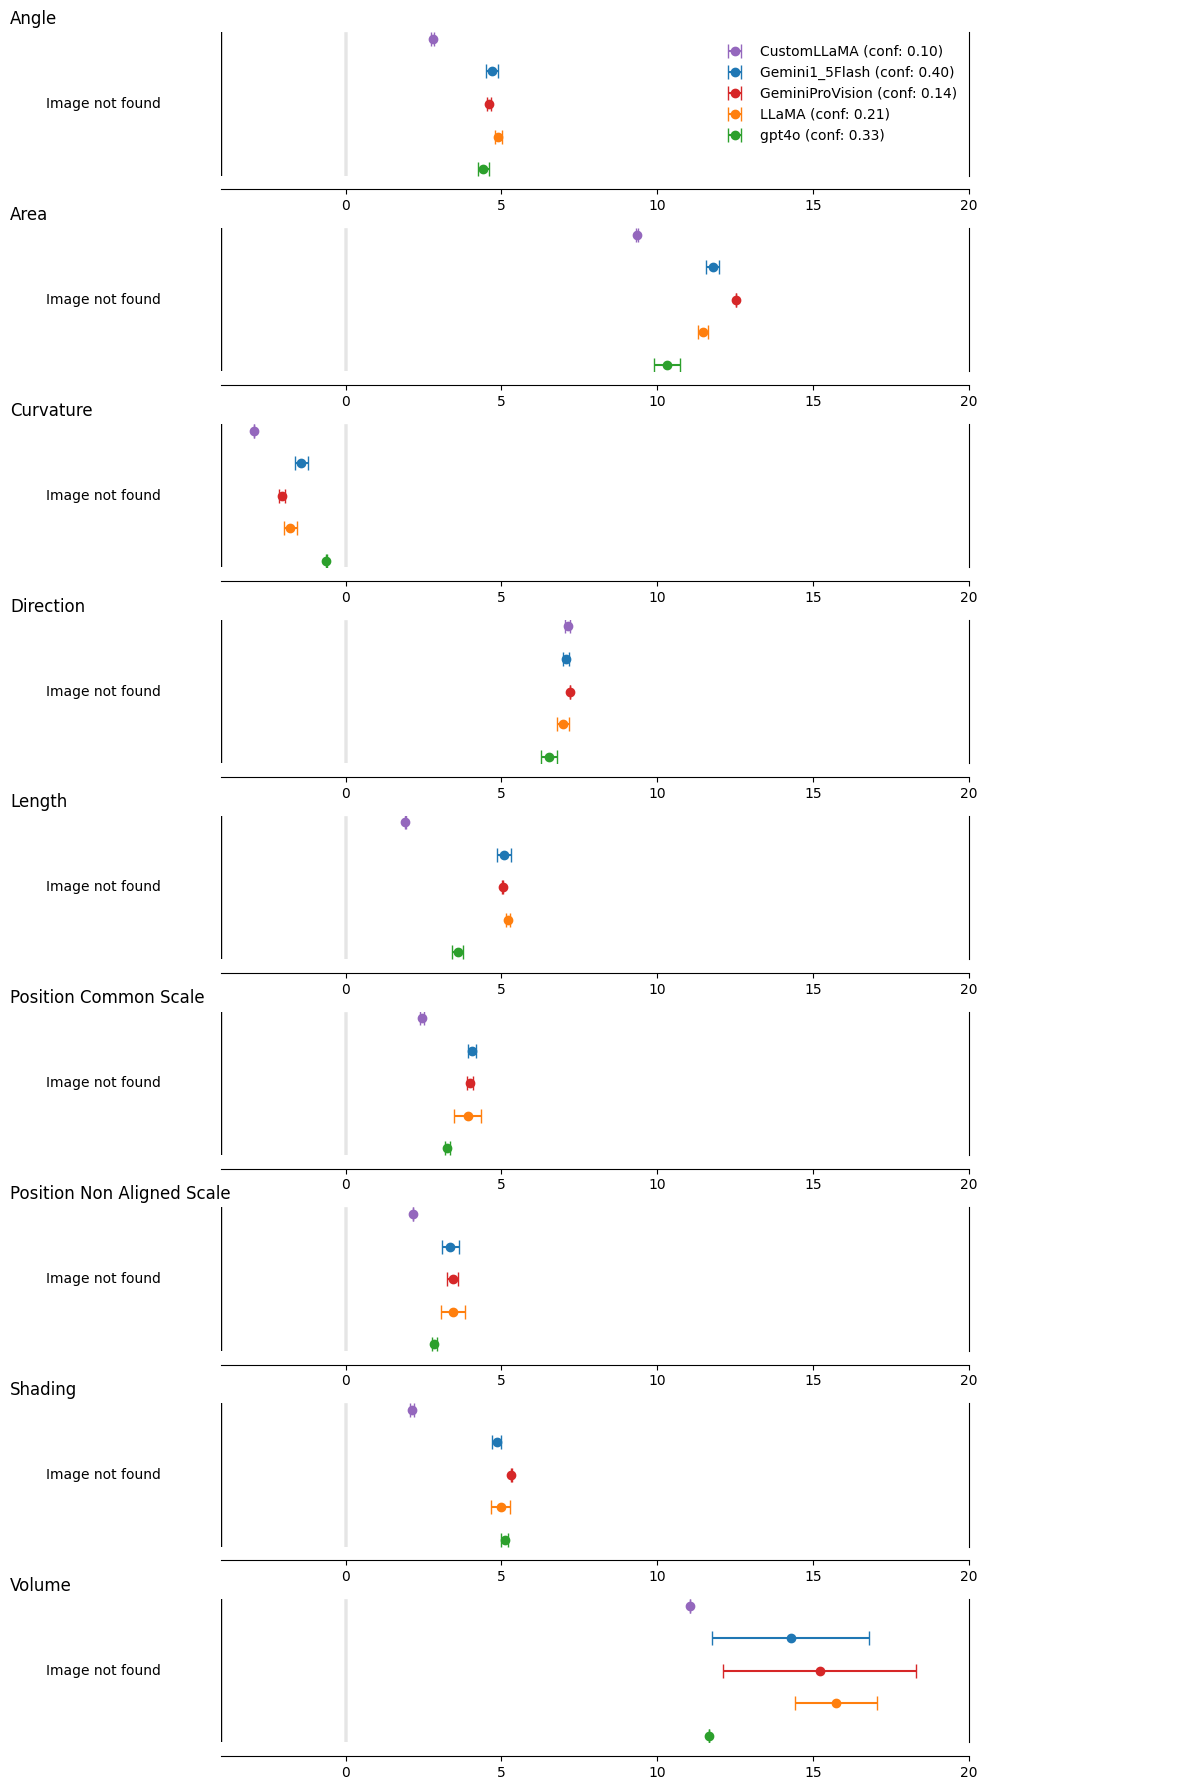

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps

# Define paths to the task images
task_images = {
    'position_common_scale': './position_common_scale/position_common_scale_image_1.png',
    'position_non_aligned_scale': './position_non_aligned_scale/position_non_aligned_scale_image_1.png',
    'length': './length/length_image_1.png',
    'direction': './direction/direction_image_1.png',
    'angle': './angle/angle_image_1.png',
    'area': './area/area_image_1.png',
    'volume': './volume/volume_image_1.png',
    'curvature': './curvature/curvature_image_1.png',
    'shading': './shading/shading_image_1.png'
}

# Define colors for each model
model_colors = {
    "Gemini1_5Flash": "tab:blue", 
    "LLaMA": "tab:orange", 
    "gpt4o": "tab:green", 
    "GeminiProVision": "tab:red", 
    "CustomLLaMA": "tab:purple"
}

# Assuming `final_summary` is your DataFrame containing the data
num_tasks = len(final_summary['task'].unique())
fig, axes = plt.subplots(num_tasks, 3, figsize=(12, 2 * num_tasks), 
                         gridspec_kw={'width_ratios': [1, 4, 1]}, sharex=False)
fig.subplots_adjust(hspace=0.8, left=0.05, right=0.95)  # Adjust horizontal and vertical spacing

# Set figure background color to white
fig.patch.set_facecolor('white')

# Loop through each task
for i, (task_name, task_data) in enumerate(final_summary.groupby('task')):
    ax_img, ax_plot, ax_label = axes[i]

    # Display task image if available
    if task_name in task_images:
        img_path = task_images[task_name]
        if os.path.exists(img_path):
            # Open the image in grayscale (black and white)
            img = Image.open(img_path).convert("L")

            # Invert colors to make details black on a white background
            img_inverted = ImageOps.invert(img)

            # Convert to RGB and add a black border
            img_with_border = ImageOps.expand(img_inverted.convert("RGB"), border=1, fill="black")
            
            # Show the final image
            ax_img.imshow(img_with_border)
            ax_img.set_facecolor("white")  # Set background color of image subplot to white
        else:
            ax_img.text(0.5, 0.5, "Image not found", ha="center", va="center", fontsize=10, color="black")
            ax_img.set_facecolor("white")  # Set background to white if image not found

    ax_img.axis('off')
    ax_img.set_title(task_name.replace('_', ' ').title(), loc="left", fontsize=12, color="black")

    # Sort model names alphabetically and get y positions
    sorted_model_names = sorted(task_data['model_name'].unique())
    y_positions = np.arange(len(sorted_model_names))

    # Plot MLAE and error bars in the middle
    for j, model_name in enumerate(sorted_model_names):
        model_data = task_data[task_data['model_name'] == model_name]
        mlae_value = model_data['mlae'].values[0]
        std_value = model_data['std'].values[0]
        confidence_value = model_data['confidence'].values[0]

        # Plot MLAE with error bars
        ax_plot.errorbar(mlae_value, j, xerr=std_value, fmt='o', color=model_colors.get(model_name, 'gray'), 
                         capsize=5, label=f"{model_name} (conf: {confidence_value:.2f})" if i == 0 else None)

    # Add a solid line at -4
    ax_plot.axvline(-4, color="black", linewidth=1)  # Solid line at -4
    
    # Add a solid line at -14
    #ax_plot.axvline(14, color="black", linewidth=1)  # Solid black line at x = -14

    # Add a blurred line at 0 by drawing multiple semi-transparent lines
    for offset in np.linspace(-0.05, 0.05, 10):  # Fine offsets around 0
        ax_plot.axvline(0 + offset, color="gray", alpha=0.1, linewidth=0.5)  # Blurred effect

    # Customize the middle plot
    ax_plot.spines['top'].set_visible(False)     # Hide the top spine
    ax_plot.spines['right'].set_color("black")  # Hide the right spine
    ax_plot.spines['left'].set_visible(False)    # Hide the left spine
    ax_plot.spines['bottom'].set_position(('outward', 10))  # Move bottom spine outward slightly for visibility

    ax_plot.set_yticks(y_positions)
    ax_plot.set_yticklabels([])  # Hide y-tick labels in the center plot
    ax_plot.set_xlim(-4, 20)  # Set x-axis limits for better view
    ax_plot.invert_yaxis()    # Match top-to-bottom ordering

    # Display model names on the right
    ax_label.set_yticks(y_positions)
    ax_label.set_yticklabels(sorted_model_names, fontsize=10)
    ax_label.tick_params(left=False, right=False, labelleft=False, labelright=True)
    ax_plot.tick_params(axis='y', which='both', left=False, right=False)  # Turn off y-axis ticks
    ax_label.set_ylim(ax_plot.get_ylim())  # Align with the main plot
    ax_label.axis("off")

# Legend for the first row
axes[0, 1].legend(loc="best", frameon=False)

plt.tight_layout()
plt.show()


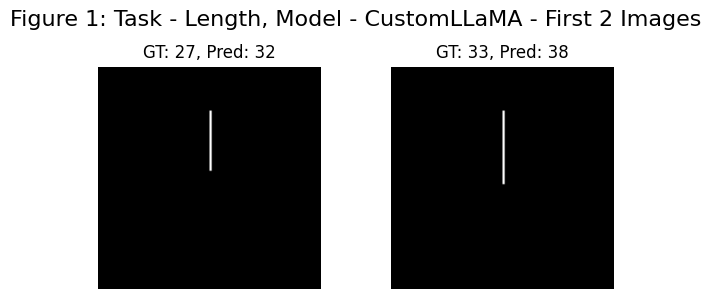

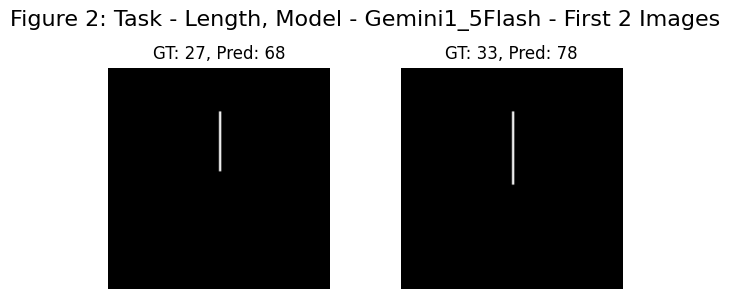

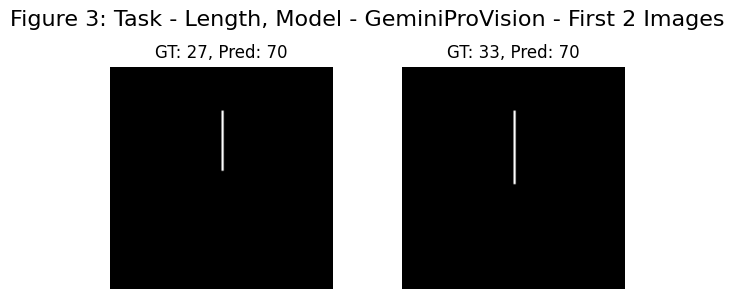

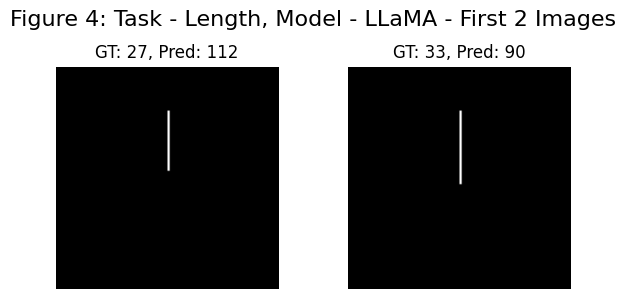

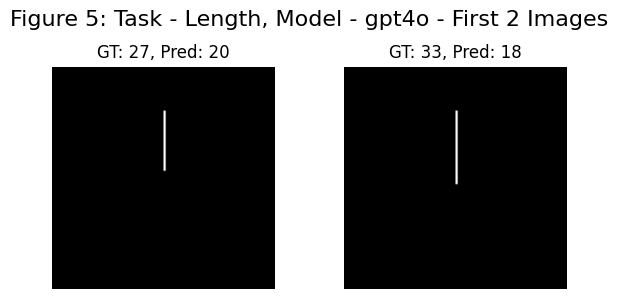

In [81]:
# Example usage
display_task_images(task="length", num_images=2, figure_num=1, num_cols=2, model_name="all")


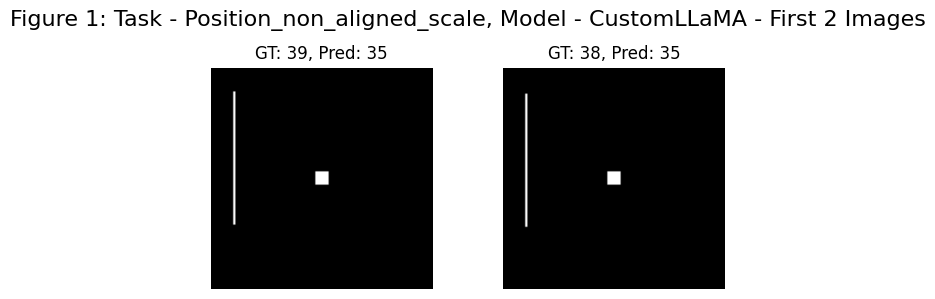

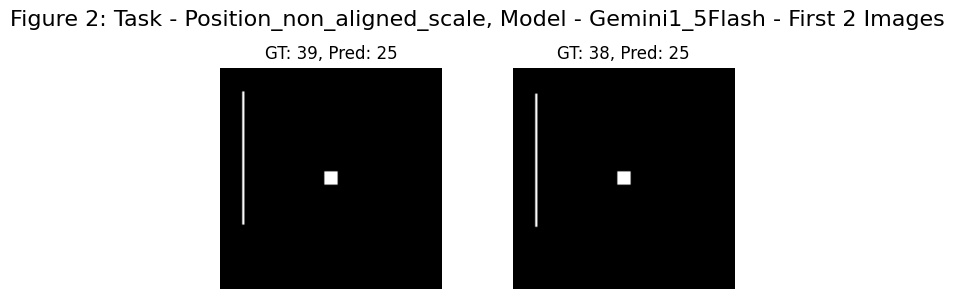

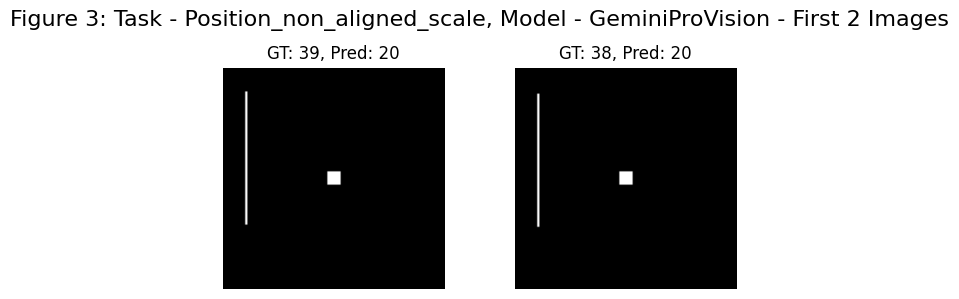

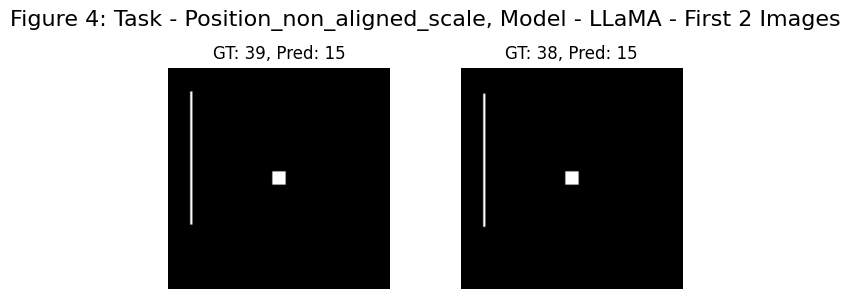

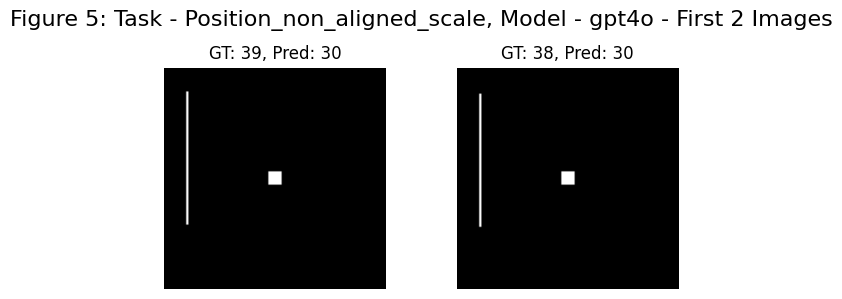

In [84]:
# Example usage
display_task_images(task="position_non_aligned_scale", num_images=2, figure_num=1, num_cols=2, model_name="all")

### Comparison of models based on MLAE

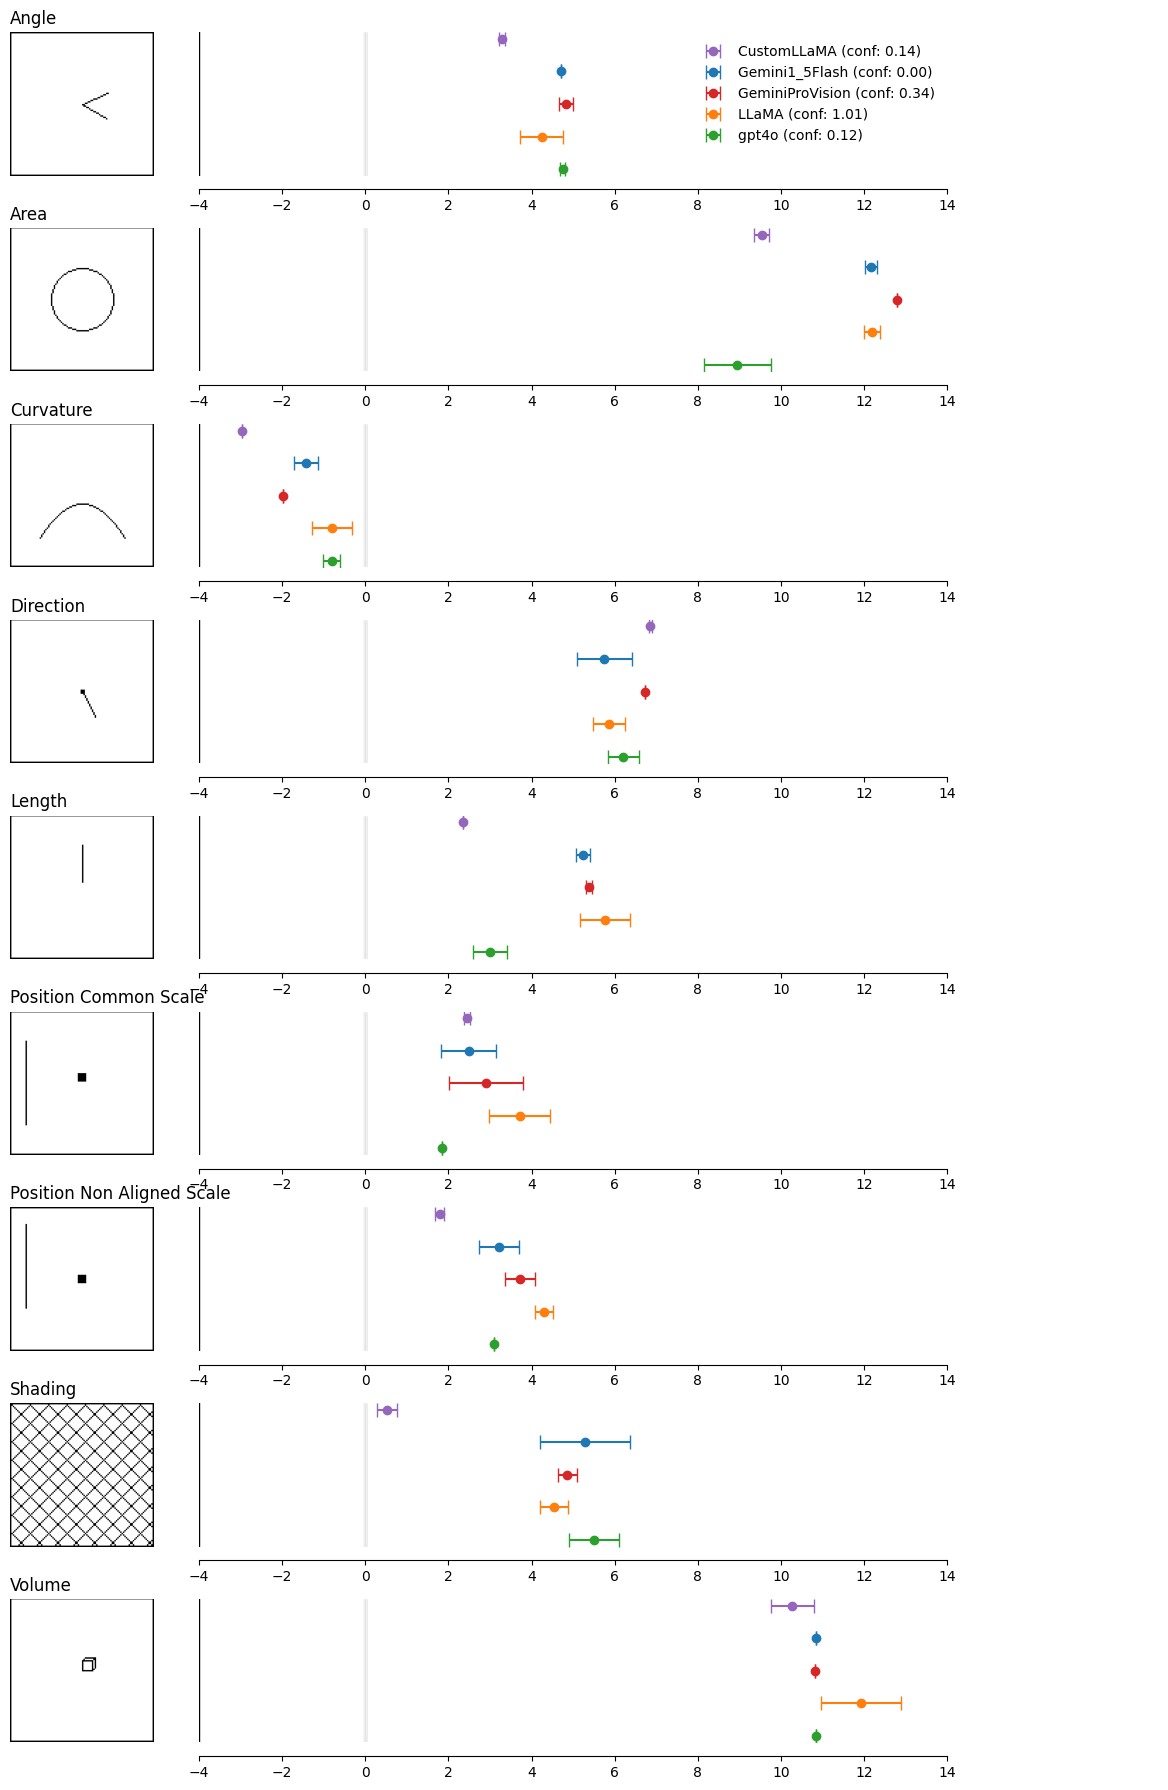

In [158]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps

# Define paths to the task images
task_images = {
    'position_common_scale': './position_common_scale/position_common_scale_image_1.png',
    'position_non_aligned_scale': './position_non_aligned_scale/position_non_aligned_scale_image_1.png',
    'length': './length/length_image_1.png',
    'direction': './direction/direction_image_1.png',
    'angle': './angle/angle_image_1.png',
    'area': './area/area_image_1.png',
    'volume': './volume/volume_image_1.png',
    'curvature': './curvature/curvature_image_1.png',
    'shading': './shading/shading_image_1.png'
}

# Define colors for each model
model_colors = {
    "Gemini1_5Flash": "tab:blue", 
    "LLaMA": "tab:orange", 
    "gpt4o": "tab:green", 
    "GeminiProVision": "tab:red", 
    "CustomLLaMA": "tab:purple"
}

# Plot configuration
num_tasks = len(final_summary['task'].unique())
fig, axes = plt.subplots(num_tasks, 3, figsize=(12, 2 * num_tasks), 
                         gridspec_kw={'width_ratios': [1, 4, 1]}, sharex=False)
fig.subplots_adjust(hspace=0.8, left=0.05, right=0.95)  # Adjust horizontal and vertical spacing

# Set figure background color to white
fig.patch.set_facecolor('white')

# Loop through each task
for i, (task_name, task_data) in enumerate(final_summary.groupby('task')):
    ax_img, ax_plot, ax_label = axes[i]

    # Display task image if available
    if task_name in task_images:
        img_path = task_images[task_name]
        if os.path.exists(img_path):
            # Open the image in grayscale (black and white)
            img = Image.open(img_path).convert("L")

            # Invert colors to make details black on a white background
            img_inverted = ImageOps.invert(img)

            # Convert to RGB and add a black border
            img_with_border = ImageOps.expand(img_inverted.convert("RGB"), border=1, fill="black")
            
            # Show the final image
            ax_img.imshow(img_with_border)
            ax_img.set_facecolor("white")  # Set background color of image subplot to white
        else:
            ax_img.text(0.5, 0.5, "Image not found", ha="center", va="center", fontsize=10, color="black")
            ax_img.set_facecolor("white")  # Set background to white if image not found

    ax_img.axis('off')
    ax_img.set_title(task_name.replace('_', ' ').title(), loc="left", fontsize=12, color="black")

    # Sort model names alphabetically and get y positions
    sorted_model_names = sorted(task_data['model_name'].unique())
    y_positions = np.arange(len(sorted_model_names))

    # Plot MLAE and error bars in the middle
    for j, model_name in enumerate(sorted_model_names):
        model_data = task_data[task_data['model_name'] == model_name]
        mlae_value = model_data['mlae'].values[0]
        std_value = model_data['std'].values[0]
        confidence_value = model_data['confidence'].values[0]

        # Plot MLAE with error bars
        ax_plot.errorbar(mlae_value, j, xerr=std_value, fmt='o', color=model_colors.get(model_name, 'gray'), 
                         capsize=5, label=f"{model_name} (conf: {confidence_value:.2f})" if i == 0 else None)

    # Add a solid line at -1
    ax_plot.axvline(-4, color="black", linewidth=1)  # Solid line at -1
    # Add a solid line at -14
    ax_plot.axvline(-14, color="black", linewidth=1)  # Solid black line at x = -14


    # Add a blurred line at 0 by drawing multiple semi-transparent lines
    for offset in np.linspace(-0.05, 0.05, 10):  # Fine offsets around 0
        ax_plot.axvline(0 + offset, color="gray", alpha=0.1, linewidth=0.5)  # Blurred effect

    # Customize the middle plot
    ax_plot.spines['top'].set_visible(False)     # Hide the top spine
    ax_plot.spines['right'].set_visible(False)   # Hide the right spine
    ax_plot.spines['left'].set_visible(False)    # Hide the left spine
    ax_plot.spines['bottom'].set_position(('outward', 10))  # Move bottom spine outward slightly for visibility

    ax_plot.set_yticks(y_positions)
    ax_plot.set_yticklabels([])  # Hide y-tick labels in the center plot
    ax_plot.set_xlim(-4, 14)  # Set x-axis limits for better view
    ax_plot.invert_yaxis()    # Match top-to-bottom ordering

    # Display model names on the right
    ax_label.set_yticks(y_positions)
    ax_label.set_yticklabels(sorted_model_names, fontsize=10)
    ax_label.tick_params(left=False, right=False, labelleft=False, labelright=True)
    ax_plot.tick_params(axis='y', which='both', left=False, right=False)  # Turn off y-axis ticks
    ax_label.set_ylim(ax_plot.get_ylim())  # Align with the main plot
    ax_label.axis("off")

# Legend for the first row
axes[0, 1].legend(loc="best", frameon=False)

plt.tight_layout()
plt.show()


### Comparison of models based on ground truth and parsed answers for all 3 runs


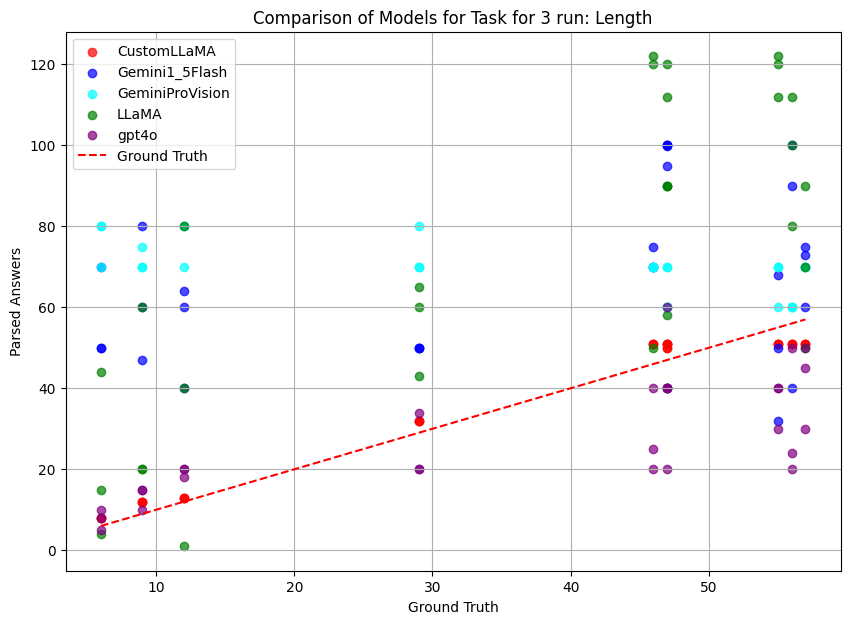

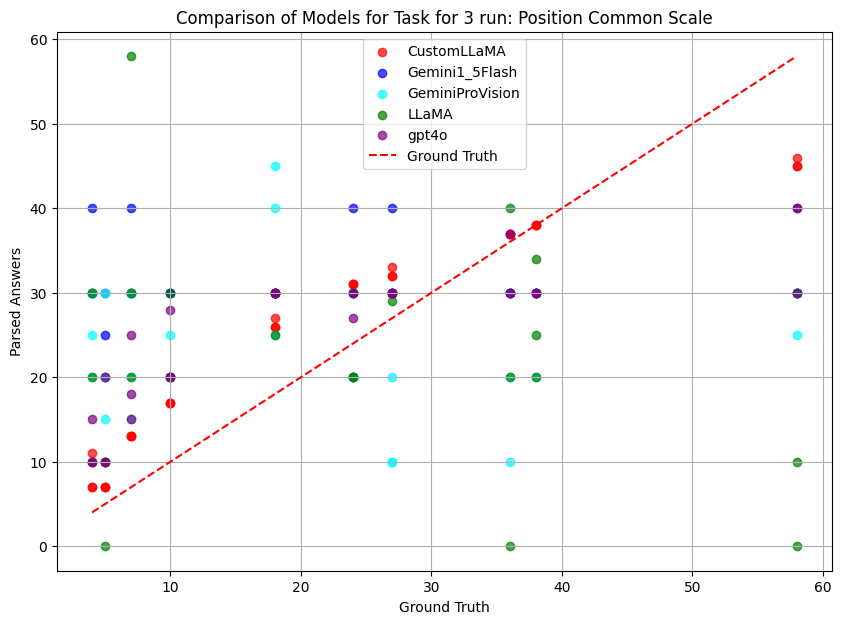

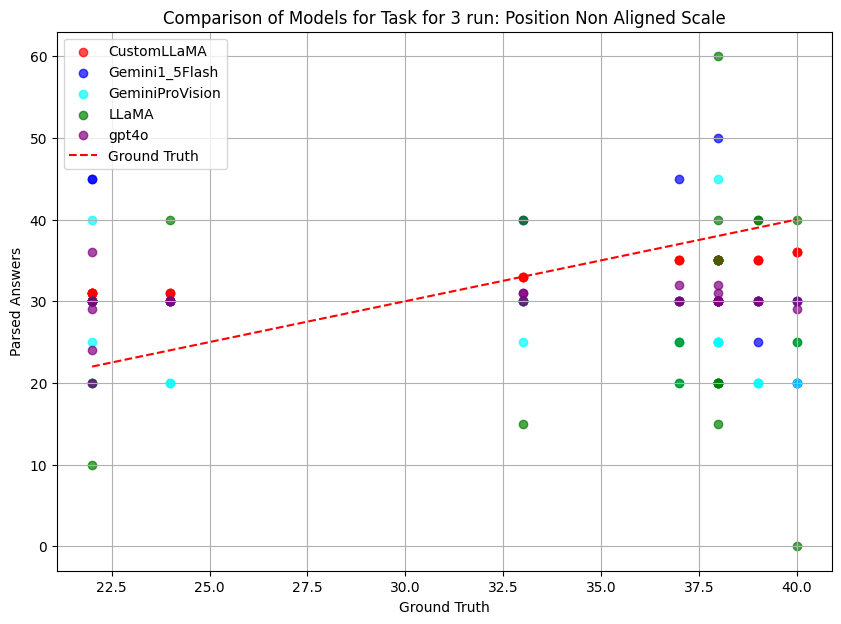

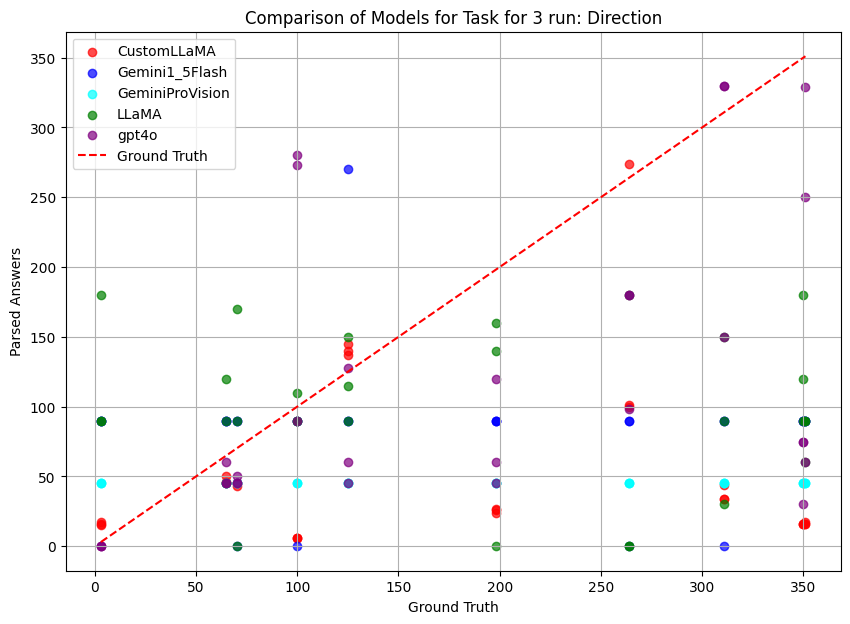

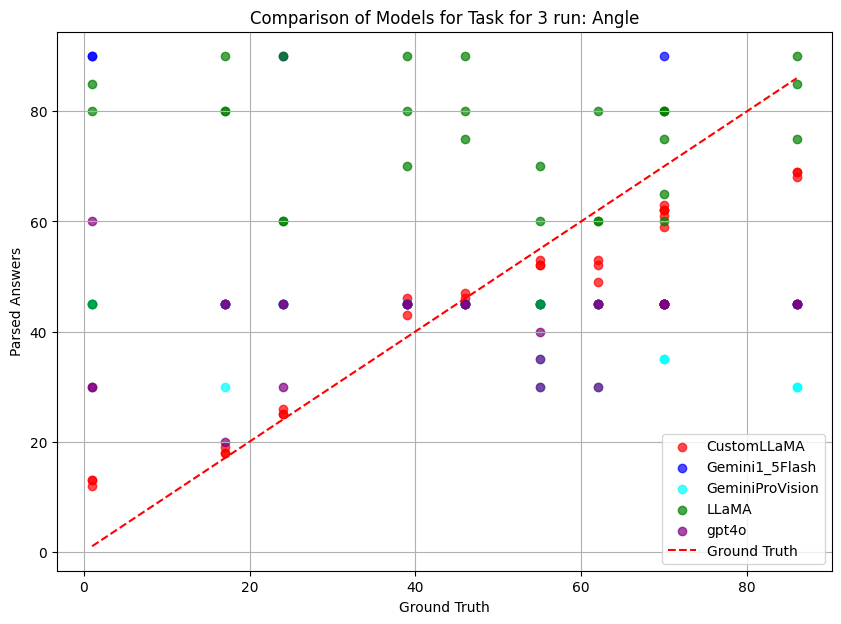

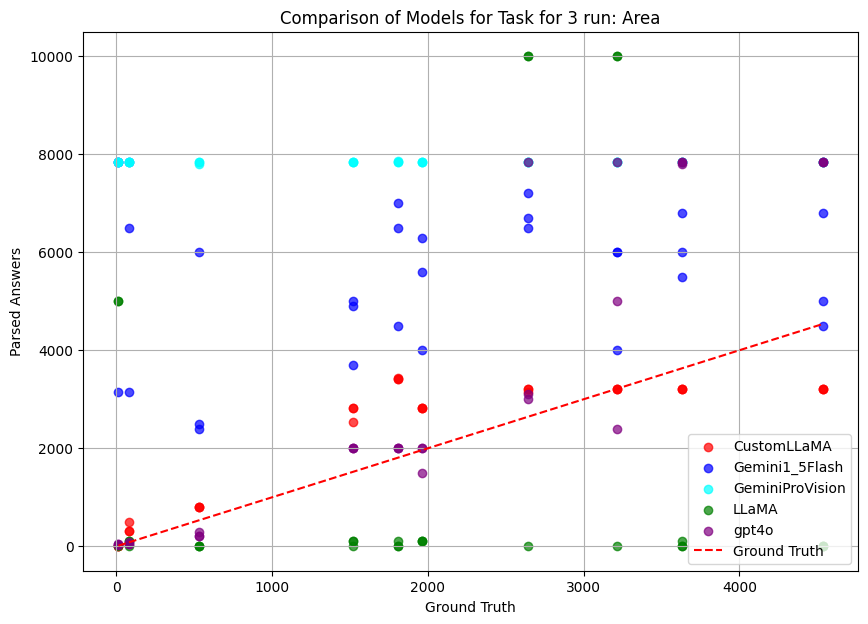

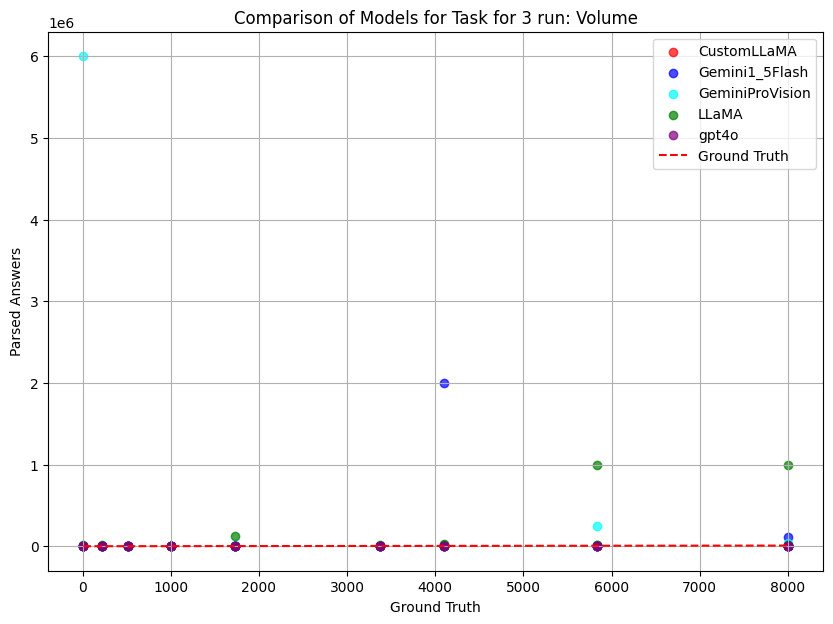

In [104]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Ensure parsed_answers is converted to float
all_data['parsed_answers'] = all_data['parsed_answers'].apply(lambda x: float(x.strip('[]')) if isinstance(x, str) else x)

tasks_to_plot = [
    'length', 
    'position_common_scale', 
    'position_non_aligned_scale',
    'direction', 
    'angle',
    'area',
    'volume',
    'shading'
]

# Define custom colors for each model
model_colors = {
    'CustomLLaMA': 'red',
    'gpt4o': 'purple',
    'LLaMA': 'green',
    'Gemini1_5Flash': 'blue',
    'GeminiProVision': 'cyan'
}

for task_to_plot in tasks_to_plot:
    task_data = all_data[all_data['task'] == task_to_plot]

    plt.figure(figsize=(10, 7))

    for model_name, model_data in task_data.groupby('model_name'):
        # Ensure ground truth and parsed answers are the same size
        x_values = model_data['ground_truth'].values
        y_values = model_data['parsed_answers'].values

        plt.scatter(x_values, y_values, label=model_name, alpha=0.7, color=model_colors.get(model_name, 'gray'))  # Default to gray if model not found

    plt.xlabel('Ground Truth')
    plt.ylabel('Parsed Answers')
    plt.title(f"Comparison of Models for Task for 3 run: {task_to_plot.replace('_', ' ').title()}")

    min_gt, max_gt = task_data['ground_truth'].min(), task_data['ground_truth'].max()
    plt.plot([min_gt, max_gt], [min_gt, max_gt], 'r--', label='Ground Truth')  # Line for Ground Truth

    plt.legend()
    plt.grid(True)
    plt.show()
